# Recherche (partie I): le modele SIR

<div class="alert alert-block alert-info">
<li>Prénoms et noms: Ina Campan / Catalina Danila / Dorka Kiraly
<li>Groupe: ARE Viral G2
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.integrate import odeint
from scipy.optimize import fsolve
from numpy import linalg

<div class="alert alert-block alert-warning">
    Les equations du <b><code>modele SIR</code></b> sont:
     
$$S'(t) = -\alpha S(t)I(t)\\
I'(t) = \alpha S(t)I(t) - \beta I(t)\\
R'(t) = \beta I(t)$$
    

<div class="alert alert-block alert-warning">
    On note que la <b><code>dynamique de la classe infectieuse</code></b> dépend du rapport suivant:
     
$$\\R_0 = \frac {\alpha} {\beta}
$$


<div class="alert alert-block alert-warning">
    <b>Attention:</b> on a considéré aussi que <b><code>la population totale (N) est constante</code></b>.

In [2]:
#fonction calculant les composantes du systeme
def SIR(y, t, alpha, beta):
    S, I, R = y
    return np.array([-alpha*S*I,alpha*S*I - beta*I, beta*I])

In [3]:
#fonction calculant la matrice jacobienne du systeme
def matrice_jacobienne(y0, alpha, beta):
    A = np.zeros((3,3))
    S, I, R = y0
    A[0,0] = -alpha*I
    A[0,1] = -alpha*S
    A[0,2] = 0
    A[1,0] = alpha*I
    A[1,1] = alpha*S - beta
    A[1,2] = 0
    A[2,0] = 0
    A[2,1] = beta
    A[2,2] = 0
    return A

In [4]:
T = 150
N = 1000
temps = [T*i/N for i in range(N+1)]

In [5]:
y0 = [0.96, 0.04, 0.] #on utilise des pourcentages de la population, divisee en compartiments
alpha = .4
beta = .25
beta2 = .30
#Cas n°1: S0 > beta/alpha --> il y a une epidemie
#convergence de R vers 1/R0 et de I vers 0

In [6]:
Sol1 = scipy.integrate.odeint(SIR,y0,temps,args=(alpha,beta))
S, I, R = Sol1.T
Sol2 = scipy.integrate.odeint(SIR,y0,temps,args=(alpha,beta2))
S2, I2, R2 = Sol2.T

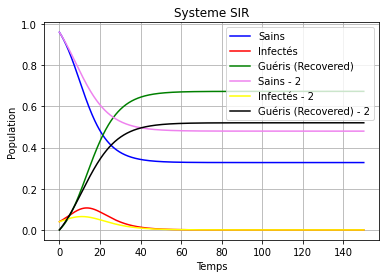

In [7]:
plt.plot(temps,S, 'blue', label = 'Sains')
plt.plot(temps,I, 'red', label = 'Infectés')
plt.plot(temps,R, 'green', label = 'Guéris (Recovered)')

plt.plot(temps,S2, 'violet', label = 'Sains - 2')
plt.plot(temps,I2, 'yellow', label = 'Infectés - 2')
plt.plot(temps,R2, 'black', label = 'Guéris (Recovered) - 2')
#on observe l'effet d'un changement minore de parametre

plt.grid()
plt.title("Systeme SIR")

plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()

plt.show()

In [8]:
M1 = matrice_jacobienne(y0, alpha, beta)
linalg.eig(M1)
#2 valeurs propres complexes, une valeur propre = 0

(array([0.   +0.j        , 0.059+0.02278157j, 0.059-0.02278157j]),
 array([[ 0.        +0.j        ,  0.76861514+0.j        ,
          0.76861514-0.j        ],
        [ 0.        +0.j        , -0.15012014-0.04559964j,
         -0.15012014+0.04559964j],
        [ 1.        +0.j        , -0.61849499+0.04559964j,
         -0.61849499-0.04559964j]]))

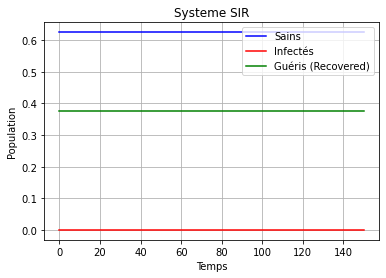

In [9]:
#points d'equilibres
ytest = [0.625, 0., 0.375]
Sol = scipy.integrate.odeint(SIR,ytest,temps,args=(alpha,beta))
S, I, R = Sol.T
plt.plot(temps,S, 'blue', label = 'Sains')
plt.plot(temps,I, 'red', label = 'Infectés')
plt.plot(temps,R, 'green', label = 'Guéris (Recovered)')
plt.grid()
plt.title("Systeme SIR")

plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()

plt.show()

In [10]:
M2 = matrice_jacobienne(ytest, alpha, beta)
linalg.eig(M2)

(array([-0.,  0.,  0.]),
 array([[ 1.00000000e+000,  0.00000000e+000,  7.07106781e-001],
        [ 0.00000000e+000,  0.00000000e+000,  8.50296623e-292],
        [ 0.00000000e+000,  1.00000000e+000, -7.07106781e-001]]))

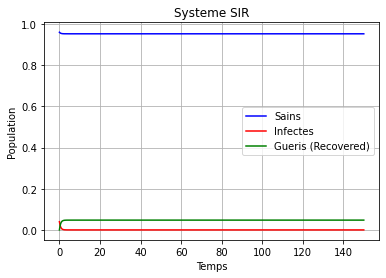

In [11]:
alpha = 1/3
beta = 2
#Cas n°2: S0 < beta/alpha --> il y a pas une epidemie

Sol = scipy.integrate.odeint(SIR,y0,temps,args=(alpha,beta))
S, I, R = Sol.T

plt.plot(temps,S, 'blue', label = 'Sains')
plt.plot(temps,I, 'red', label = 'Infectes')
plt.plot(temps,R, 'green', label = 'Gueris (Recovered)')
plt.grid()
plt.title("Systeme SIR")

plt.xlabel('Temps')
plt.ylabel('Population')
plt.legend()

plt.show()

In [12]:
M3 = matrice_jacobienne(y0, alpha, beta)

In [13]:
linalg.eig(M3)
#deux valeurs propres negatives + une valeur prope egale a 0 --> constantes

(array([ 0.        , -1.67743606, -0.01589728]),
 array([[ 0.        , -0.12263956, -0.70426848],
        [ 0.        , -0.63776509, -0.00564283],
        [ 1.        ,  0.76040465,  0.70991131]]))